In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import talkanalyzer as ta # Requires pandas
import warnings 
warnings.filterwarnings('ignore') # Remove for debugging
import networkx as nx
from itertools import combinations
from collections import Counter
#help(ta)

In [2]:
df = pd.read_json("data/project-376-comments_2017-11-21.json")
df.head()
#df.to_excel("data/project-376-comments_2017-11-21.xlsx")
#df.insert(0, "CommentURL", "")
#df.insert(0, "ThreadURL", "")
#df['comment_focus_type']

,board_description,board_id,board_title,comment_body,comment_created_at,comment_focus_id,comment_focus_type,comment_id,comment_user_id,comment_user_login,discussion_id,discussion_title
0,General comment threads about individual subjects,192,Notes,Can't tell what the red/brown blob on the righ...,2015-11-09 20:50:03.309,1071522.0,Subject,33075,1396273,Sprixie,16496,Subject 1071522
1,General comment threads about individual subjects,192,Notes,"yes i agree, judging by the rough edges round ...",2015-11-10 17:11:02.277,1071522.0,Subject,33406,1813,hightower73,16496,Subject 1071522
2,"Ask us about specific manuscripts, scripts, ha...",195,Questions for the research team,There are only a few documents displaying in t...,2015-11-14 00:41:28.637,NaN,None,34596,1372521,Judy_Prouty,17263,Is this project proceeding?
3,General comment threads about individual subjects,192,Notes,Nothing on here?,2015-11-27 10:39:56.197,1167235.0,Subject,38341,478315,darktruth,19021,Subject 1167235
4,General comment threads about individual subjects,192,Notes,No text or image.,2015-11-27 10:42:46.044,1169357.0,Subject,38342,478315,darktruth,19022,Subject 1169357


In [3]:
hashtags = []

for row in df.iterrows():
    match = re.findall(r'\#[a-zA-Z0-9_-]+', row[1][3], re.IGNORECASE)
    for m in match:
        if m == "#v": # Note #v is a false positive genereated by google books links
            continue
        else:
            hashtags.append(m.lower())
print("Total number of hashtags: " + str(len(hashtags)))
print("Unique hashtags: " + str(len(set(hashtags))))

Total number of hashtags: 4058
Unique hashtags: 963


In [4]:
'''Get most common hashtags'''
c = Counter(hashtags)
c.most_common(20)

[('#letter', 302),
 ('#oed', 237),
 ('#recipe', 222),
 ('#medicine', 162),
 ('#latin', 143),
 ('#womanwriter', 139),
 ('#catholic', 129),
 ('#copiedletter', 120),
 ('#address', 79),
 ('#medical', 64),
 ('#cooking', 59),
 ('#bleedthrough', 58),
 ('#ward', 58),
 ('#paper', 54),
 ('#packe', 50),
 ('#baker', 45),
 ('#cromwell', 35),
 ('#food', 34),
 ('#corlyon', 33),
 ('#recipes', 32)]

In [5]:
userspinged = []

for row in df.iterrows():
    #Note ._- are allowd chars in usernames. However, including . throws false positives and are not used in any usernames.
    match = re.findall(r'\@[a-zA-Z0-9_-]+', row[1][3], re.IGNORECASE) 
    for m in match:
        userspinged.append(m.lower())
print("Total number of pings: " + str(len(userspinged)))
print("Unique users tha are pinged: " + str(len(set(userspinged))))
# print(set(userspinged))

Total number of pings: 3622
Unique users tha are pinged: 294


In [6]:
'''Get most common users that are pinged'''
c = Counter(userspinged)
c.most_common(20)

[('@mutabilitie', 454),
 ('@philipdurkin', 346),
 ('@vvh', 335),
 ('@jules', 236),
 ('@hwolfe', 192),
 ('@s_powell', 175),
 ('@parsfan', 143),
 ('@lwsmith', 123),
 ('@cuboctahedron', 104),
 ('@greensleeves', 83),
 ('@simoneduca', 73),
 ('@elaineleong', 69),
 ('@traceydix', 68),
 ('@christoferos', 66),
 ('@parsan', 43),
 ('@intelvoid', 38),
 ('@joolslee', 38),
 ('@camallen', 34),
 ('@hannebambel', 31),
 ('@cdorsett', 31)]

@mutabilitie 454
@philipdurkin 346
@vvh 335
@jules 236
@hwolfe 192
@s_powell 175
@parsfan 143
@lwsmith 123
@cuboctahedron 104
@greensleeves 83
@simoneduca 73
@elaineleong 69
@traceydix 68
@christoferos 66
@parsan 43
@intelvoid 38
@joolslee 38
@camallen 34
@hannebambel 31
@cdorsett 31
@hightower73 29
@dizzy78 26
@pding001 25
@kodemonkey 24
@fromere 24
@jenmunroe 23
@etobey 22
@pding 22
@schub 22
@kodemunkey 18
@victoria 18
@archi 17
@shaxworld 16
@lordofthepies 15
@kerebeth 14
@carl801 14
@tnetennba 14
@ebaldwin 14
@drrogg 12
@specks 11
@wh 11
@kimnj 11
@mmmvv1 11
@spock42 10
@architeuthis 10
@karenvanhoek 10
@archaeochef 10
@elainelong 10
@griddlesticks 10
@captain_video 9
@ahatlikethat 9
@tudorcook 9
@forestpreserve 8
@woo-h 8
@stevenpemberton 7
@elbutler 6
@gmail 6
@theletterb 6
@sarahtheentwife 6
@carriechelle 6
@cliffwebb 5
@kathrynparsons 5
@jwb52z 5
@ronvel 5
@brownfox 5
@croquegrec09 5
@thel 5
@myramo 5
@rent 5
@hallkr 5
70
[454, 346, 335, 236, 192, 175, 143, 123, 104, 83, 73, 6

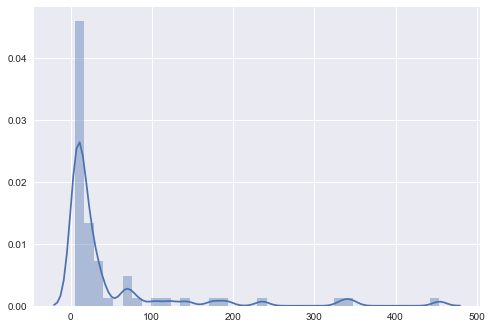

In [7]:
valuelist = []
for v in c.most_common(1000):
    if v[1] >= 5:
        valuelist.append(v[1])
        print(v[0], v[1])
    else:
        continue
        #print(v[0])
print(len(valuelist))
print(valuelist)
sns.distplot(valuelist)

### Hashtag/user network
This takes a hashtag and then plots a network based on which users that has written about it in the forum. The closer to the center concept, the more often the users write about it. The function:

````python
def makegraph(searchstring, nodefreq, regexp=False, users=True, plot=True)
````

In [37]:
ta.CoreSet.frequency("#money", df)

Searching for: #money


[('Cuboctahedron', 1), ('fromere', 1)]

In [38]:
ta.CoreSet.frequencypercent("#letter", df)

Searching for: #letter
Total hashtags: 260


[('Cuboctahedron', 0.5),
 ('parsfan', 0.14),
 ('Traceydix', 0.12),
 ('kodemunkey', 0.1),
 ('fromere', 0.08),
 ('joolslee', 0.02),
 ('Kimnj', 0.01),
 ('Christoferos', 0.01),
 ('bootnecksbs', 0.0),
 ('Mspinelli91', 0.0),
 ('Archi', 0.0),
 ('MoragX', 0.0),
 ('the_interuniversal_geometer', 0.0)]

In [15]:
for t in ta.CoreSet.hashtagtimeseries("#oed", df).iterrows():
    print(t[1][0])
    print(t[1][1])
    print(t[1][2])
    print(t[1][3])
    print("------")


VVH
2015-12-13 13:26:29.051000
#oed
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/228/20977?comment=43165
------
VVH
2015-12-17 17:21:46.316000
#oed
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/229/21684?comment=44841
------
VVH
2015-12-18 11:46:07.721000
#oed
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21745?comment=45126
------
IntelVoid
2015-12-19 08:53:37.398000
#oed
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/20983?comment=45441
------
LWSmith
2015-12-29 21:09:26.181000
#oed
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/24397?comment=49840
------
LWSmith
2016-01-01 00:05:00.464000
#oed
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/24872?comment=50883
------
LWSmith
2016-01-05 14:40:51.649000
#oed
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/20690?comment=52709
------
LWSmith
2016-01-

In [39]:
ta.CoreSet.hashtagtimeseries("#womanwriter", df)['Timestamp']

0    2015-12-10 16:48:16.372
1    2015-12-10 17:51:43.537
2    2015-12-10 18:03:14.555
3    2015-12-10 18:09:08.853
4    2015-12-10 23:28:41.703
5    2015-12-11 16:34:15.917
6    2015-12-11 17:23:19.682
7    2015-12-11 18:29:33.553
8    2015-12-11 20:00:52.875
9    2015-12-13 02:47:33.379
10   2015-12-13 14:06:09.771
11   2015-12-13 14:19:43.119
12   2015-12-14 15:23:51.972
13   2015-12-14 17:04:48.450
14   2015-12-15 09:32:18.498
15   2015-12-15 13:48:17.294
16   2015-12-15 19:53:43.351
17   2015-12-16 14:30:09.570
18   2015-12-16 16:19:27.774
19   2015-12-18 16:51:35.822
20   2015-12-18 22:49:03.204
21   2015-12-18 23:40:12.901
22   2015-12-20 16:24:36.157
23   2015-12-21 13:17:55.799
24   2015-12-21 19:20:17.265
25   2015-12-21 19:34:35.142
26   2015-12-22 18:18:11.706
27   2015-12-22 19:49:03.268
28   2015-12-24 13:02:26.785
29   2015-12-24 14:29:04.819
               ...          
62   2016-02-20 16:22:06.196
63   2016-02-26 15:40:03.017
64   2016-03-04 14:47:31.934
65   2016-03-1

In [40]:
searchterm = "#corlyon"

X = ta.CoreSet.hashtagtimeseries(searchterm, df)['Timestamp']
user = list(range((len(X))))
userlist = ta.CoreSet.hashtagtimeseries(searchterm, df)['User']
factorized = pd.factorize(userlist)
print(factorized[0])
#print(c)

[0 1]


In [41]:
hexlist = []
for f in factorized[0]:
    hexlist.append(str('{0:06X}'.format(f*560000)))

['000000', '088B80']
2016-02-05 14:30:22.280000 0 000000
2016-04-14 21:35:22.922000 1 088B80


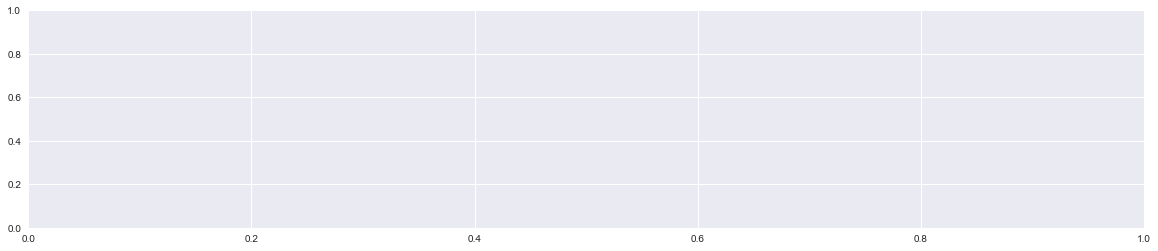

NameError: name 'x' is not defined

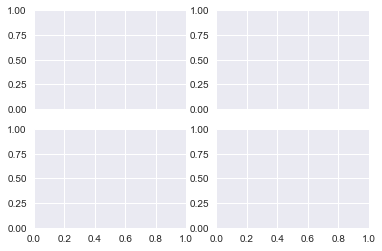

In [42]:
fig, ax = plt.subplots(figsize=(20,4))
userlist = ta.CoreSet.hashtagtimeseries(searchterm, df)['Timestamp']
color = [item for item in hexlist]
print(color)

test = ['C1', 'C2', 'C3']

#plt.plot(X, user, 'ro')
for X, user, color in zip(X, user, color):
    print(X, user, color)

#plt.plot(X, user, ".", color=('111700'))

#fig.autofmt_xdate()

plt.show()




fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True)

titles = ['Linear', 'Squared', 'Cubic', 'Quartic']
y_vals = [x, x * x, x**3, x**4]

# axes.flat returns the set of axes as a flat (1D) array instead
# of the two-dimensional version we used earlier
for ax, title, y in zip(axes.flat, titles, y_vals):
    ax.plot(x, y)
    ax.set_title(title)
    ax.grid(True)

Searching for: #recipe


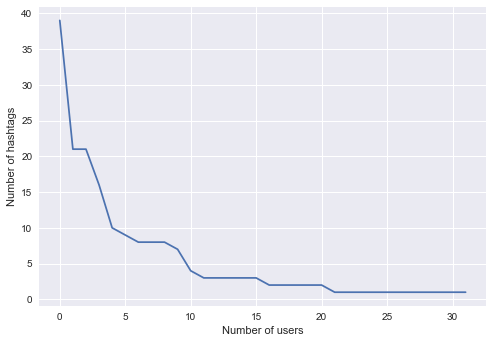

In [10]:
ta.CoreSet.histogram("#recipe", df)

Searching for: #oed


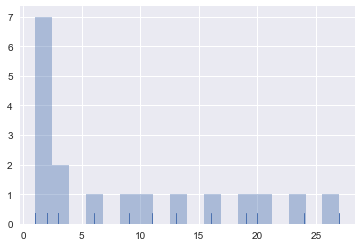

In [43]:
ta.CoreSet.distplot("#oed", df)

Searching for: #womanwriter


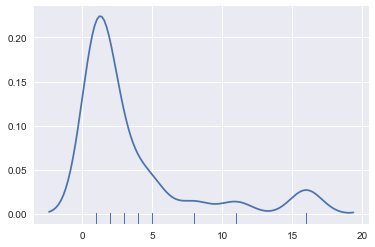

In [44]:
ta.CoreSet.kerneldistplot("#womanwriter", df)

Searching for: #letter


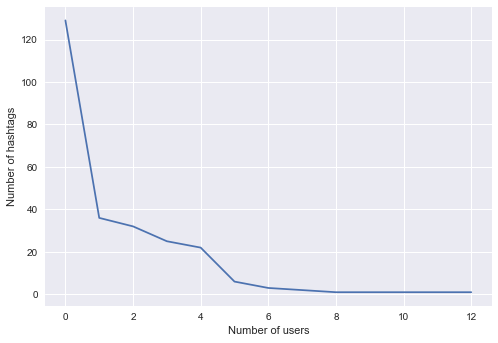

Searching for: #letter


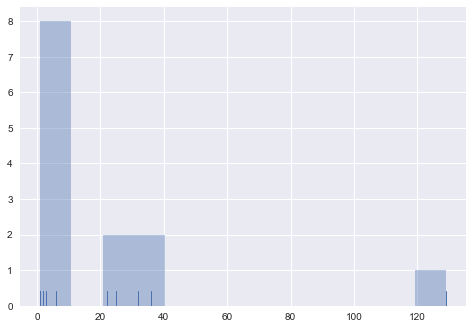

---------------
Searching for: #oed


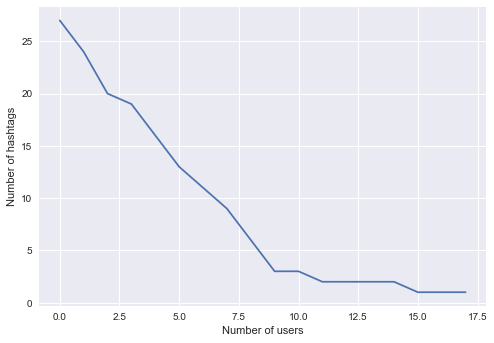

Searching for: #oed


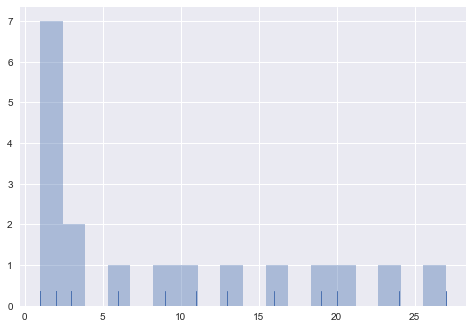

---------------
Searching for: #recipe


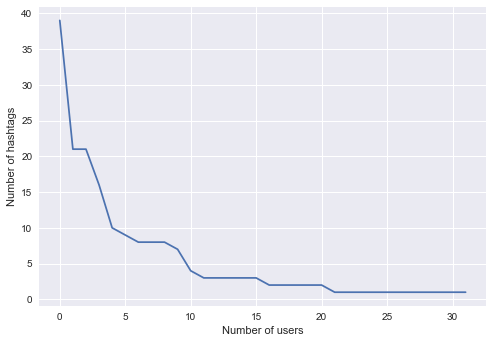

Searching for: #recipe


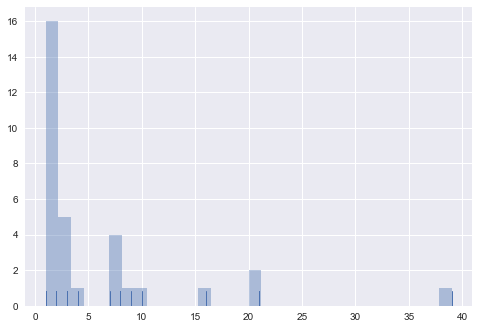

---------------
Searching for: #medicine


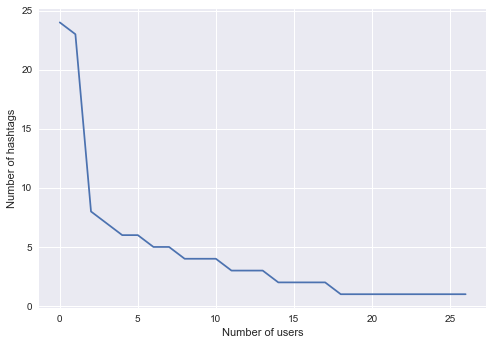

Searching for: #medicine


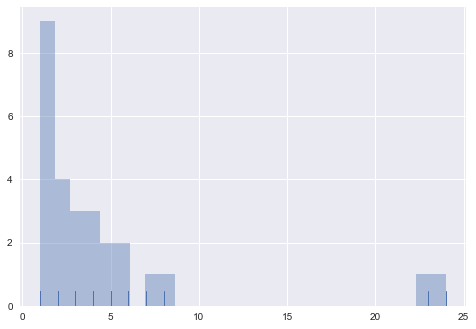

---------------
Searching for: #latin


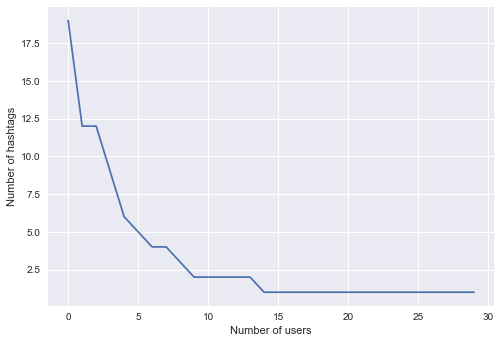

Searching for: #latin


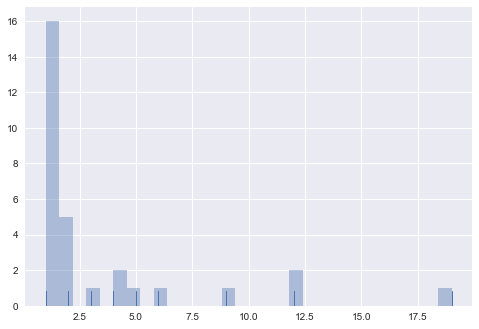

---------------
Searching for: #womanwriter


KeyboardInterrupt: 

In [5]:
'''Print graphs and stuff'''
for hashtag in c.most_common(10):
    ta.CoreSet.histogram(hashtag[0], df)
    ta.CoreSet.distplot(hashtag[0], df)
    print("---------------")

Searching for: #catholic
VVH 34
mutabilitie 15
parsfan 10
IntelVoid 5
schub 5
Traceydix 4
Cuboctahedron 3
Christoferos 3
joolslee 2
dhaunsperger 2
brownfox 2
Hannebambel 1
kodemunkey 1
edtechgirl 1
spock42 1
jules 1
Lynzw 1
carl801 1
emilyewahl 1
-----
Total value: 93
Ten percentile: 1.0
Twentyfive percentile: 1.0
Fifty percentile: 2.0
Seventyfive percentile: 4.5
Ninety percentile: 11.0
Total users: 19


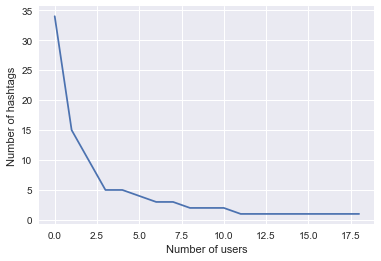

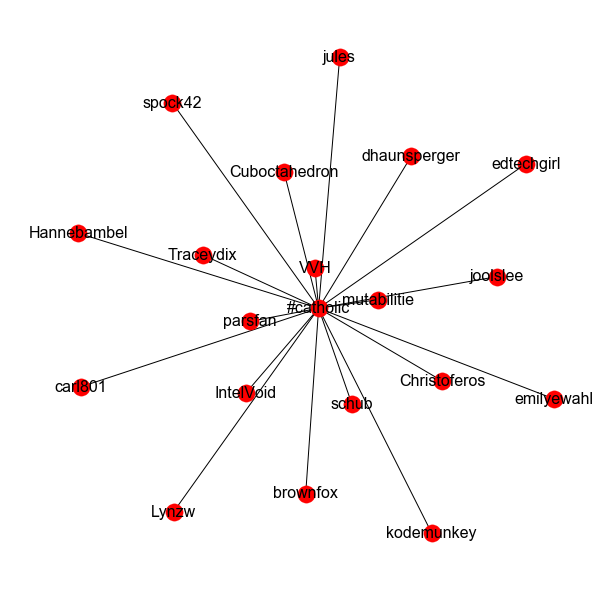

In [63]:
ta.Network.hashtagusernetwork("#catholic", df, plot=True, html=False)


In [ ]:
ta.Printer.regexpsearch('herb', df, html=False, context=True)

In [ ]:
ta.TimeSeries.regexpsearch('cathol', df)

In [ ]:
# Most common URLs linked. Note: fix regular expression to be more accurate. 
listofURLS = []
for row in df.iterrows():
    topURL = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', row[1][3])
    if topURL:
        for t in topURL:
            listofURLS.append(t)
            
from collections import Counter

for key in Counter(listofURLS).most_common(20):
    print(key)

In [ ]:
def createThreadUserNet(dataframe):
    # Intialize network file
    gexf = Gexf("Shakespeares World", "Thread User Network")
    graph = gexf.addGraph("directed", "static", "Thread User directed network")

    # Create nodes
    for user in df.comment_user_login.iteritems():
        graph.addNode(str(user[1]), str(user[1]))

    for thread in df.discussion_id.iteritems():
        graph.addNode(str(thread[1]), str(thread[1]))

    # Create edges
    counter = 0
    for x in df.iterrows():
        counter += 1
        #print(x[1][9]) # Username
        # print(x[1][10]) # Comment thread ID
        graph.addEdge(str(counter), str(x[1][9]), str(x[1][10]))

    # Write file. Note: all nodes and edges need to be added as unicode strings
    output_file = open("shakspearesworldThreadUserNet.gexf","wb")
    gexf.write(output_file)

#createThreadUserNet(df)

In [58]:
ta.Network.hashtaghashtagnetwork("#v", df)

Searching for: #v
-----
Total value: 0


IndexError: cannot do a non-empty take from an empty axes.

### Regexp/user network
Similar to the hashtag/user network but using the power of Python flavoured regexps. Case insensivive. 

In [ ]:
list(range(72))


In [57]:
ta.Network.regexpusernetwork("v", df)

Searching for: v


TypeError: makegraph() got an unexpected keyword argument 'regexp'

In [19]:
ta.Network.regexpusers("copyright", df, data=True) #returns data for plotting

Searching for: copyright


[('VVH', 3),
 ('mutabilitie', 2),
 ('jules', 2),
 ('fromere', 1),
 ('ForestPreserve', 1)]

### User/hashtag network
Tracks what hashtag a specific username writes. 

In [ ]:
ta.Network.userhashtagnetwork("Traceydix", df)

### User/user network
Takes a specific user and draws a network from the users spoken to, using the @username convention. 

This is an out-degree network. 

** Todo **: make in-degree network to see which users address a user (comparable to incoming @-tweets on Twitter). 

In [ ]:
ta.Network.userusernetwork("VVH", df)

In [61]:
ta.Printer.regexpsearch("\#v", df)



Index ID: 746
	0KNuaqjB&sig=oVhtSt5hvzBIoLUuRmV_P_qoktM#v=onepage&q=ambergris%20early%20modern%20
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21231?comment=43975
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//746
Date of post: 2015-12-15 11:51:38


Index ID: 802
	ahUKEwjg--mutN7JAhUHLhoKHaCEA9UQ6AEIIjAA#v=onepage&q=cucumbers%20and%20bartholomew
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21385?comment=44113
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//802
Date of post: 2015-12-15 17:47:01


Index ID: 869
	.co.uk/books?id=234fAAAAYAAJ&q=celandine#v=snippet&q=celandine&f=false) In this ca
https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/21558?comment=44495
Thread: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk//869
Date of post: 2015-12-16 16:11:41


Index ID: 933
	ahUKEwjQ1Pr_kePJAhUBlxQKHbpkAiwQ6AEIKTAC#v=o